In [1]:
%load_ext autoreload

%autoreload 2

from rolling_plot_utils import (
    plot_years_and_seasons,
    get_season,
    get_cuml_desired_obs,
    BASELINE_SURVEY_START_MJD,
    MJD_2024,
    YEAR,
    make_default_healpix_footprints,
)

import numpy as np
import skyproj
# import proplot as pplt
import matplotlib.pyplot as plt
import healpy as hp


/Users/beckermr/mambaforge/envs/rubin-sims/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


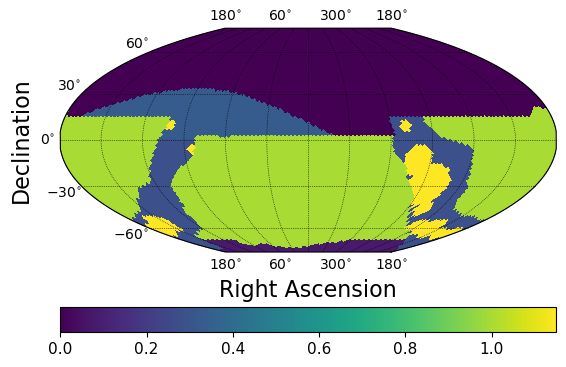

In [2]:
hp_footprints, wfd_idx = make_default_healpix_footprints()

fig, axs = plt.subplots()

sp = skyproj.McBrydeSkyproj(ax=axs)
# MollweideSkyproj(ax=axs[0, 0])
sp.draw_hpxmap(hp_footprints["r"])
sp.draw_colorbar(location="bottom", pad=0.15)

In [ ]:
from footprints import slice_quad_galactic_cut

slice_inds = slice_quad_galactic_cut(
    hp_footprints, 
    nslice=2, 
    wfd_indx=wfd_idx, 
    ra_range=(
        np.pi/4 - np.pi/2, 
        np.pi/4 + np.pi/2,
    ),
)

new_map = hp_footprints["r"] * 0

new_map[slice_inds[1]] = 1

fig, axs = plt.subplots()

sp = skyproj.MollweideSkyproj(ax=axs)
sp.draw_hpxmap(new_map)
sp.draw_colorbar(location="bottom", pad=0.15)

In [3]:
from footprints import make_rolling_footprints
from rolling_plot_utils import get_sun_ra_at_mjd, BASELINE_SURVEY_START_MJD, YEAR

shift = 0
footprint = make_rolling_footprints(
    fp_hp=hp_footprints,
    mjd_start=BASELINE_SURVEY_START_MJD+shift,
    sun_ra_start=get_sun_ra_at_mjd(BASELINE_SURVEY_START_MJD+shift),
    nslice=2,
    scale=0.8,
    nside=32,
    wfd_indx=wfd_idx,
    order_roll=0,
    n_cycles=3,
    n_constant_start=3,
    n_constant_end=6,
    uniform=False,
)

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for i, dtime in enumerate([1, 4, 7, 10]):
    d = footprint(BASELINE_SURVEY_START_MJD + dtime * YEAR + shift, norm=False)
    
    rmap = d["r"] * 0
    rmap[wfd_idx] = d["r"][wfd_idx]
    
    sp = skyproj.McBrydeSkyproj(ax=axs[i])
    sp.draw_hpxmap(rmap, vmin=0, vmax=15)
    sp.draw_colorbar(location="bottom", pad=0.15, label="year %0.2f" % dtime)

In [4]:
from rolling_plot_utils import make_footprint_gif

make_footprint_gif(
    "baseline",
    footprint,
    wfd_idx,
    BASELINE_SURVEY_START_MJD,
    10,
    images_per_year=10,
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    5.1s
[Parallel(

In [5]:
from footprints import make_rolling_footprints
from rolling_plot_utils import get_sun_ra_at_mjd, BASELINE_SURVEY_START_MJD, YEAR

shift = 0
footprint = make_rolling_footprints(
    fp_hp=hp_footprints,
    mjd_start=BASELINE_SURVEY_START_MJD+shift,
    sun_ra_start=get_sun_ra_at_mjd(BASELINE_SURVEY_START_MJD+shift),
    nslice=2,
    scale=0.8,
    nside=32,
    wfd_indx=wfd_idx,
    order_roll=0,
    n_cycles=3,
    n_constant_start=3,
    n_constant_end=6,
    uniform=True,
)

In [ ]:
import healpy as np

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for i, dtime in enumerate([1]):
    d = footprint(BASELINE_SURVEY_START_MJD + dtime * YEAR + shift, norm=False)
    
    rmap = d["r"] * 0
    rmap[wfd_idx] = d["r"][wfd_idx]

    ax = axs
    plt.sca(ax)
    res = hp.mollview(
        rmap, min=0, max=10, cmap="Reds", hold=True, title="",
        unit="cumul. visits relative to one year",
    )
    hp.visufunc.graticule(dpar=30, dmer=60, color="gray", alpha=0.5)
    plt.gca().text(
        0, 
        1,
        "Y%0.2f" % dtime,
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=18,
    )
    plt.gca().text(
        1, 
        1,
        "uniform",
        transform=ax.transAxes,
        ha="right",
        va="top",
        fontsize=18,
    )
    
    # sp = skyproj.McBrydeSkyproj(ax=axs[i])
    # sp.draw_hpxmap(rmap, vmin=0, vmax=15)
    # sp.draw_colorbar(location="bottom", pad=0.15, label="year %0.2f" % dtime)

In [ ]:
sp.ax.__class__

In [6]:
from rolling_plot_utils import make_footprint_gif

make_footprint_gif(
    "uniform",
    footprint,
    wfd_idx,
    BASELINE_SURVEY_START_MJD,
    10,
    images_per_year=10,
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    1.1s
[Parallel(

In [ ]:
"RMS: %2d" % 1

In [ ]:
"RMS: %2d" % 10

In [ ]:
import glob

In [ ]:
glob.glob("nonuniform_survey_[0-9][0-9][0-9][0-9].jpeg")

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for i, dtime in enumerate([1, 4, 7, 10]):
    d = footprint(BASELINE_SURVEY_START_MJD + dtime * YEAR + shift, norm=False)
    
    rmap = d["r"] * 0
    rmap[wfd_idx] = d["r"][wfd_idx]
    
    sp = skyproj.McBrydeSkyproj(ax=axs[i])
    sp.draw_hpxmap(rmap, vmin=0, vmax=15)
    sp.draw_colorbar(location="bottom", pad=0.15, label="year %0.2f" % dtime)

In [ ]:
from rolling_plot_utils import make_footprint_gif

make_footprint_gif(
    "nonuniform_survey",
    footprint,
    wfd_idx,
    BASELINE_SURVEY_START_MJD,
    10,
    images_per_year=10,
)

In [ ]:
import tqdm
import os

import glob

import joblib

def _render(fbase, d, mjd, dtime, wfd_idx):
    d = footprint(mjd, norm=False)
    
    fig, axs = plt.subplots(figsize=(10, 6))
    
    rmap = d["r"] * 0
    rmap[wfd_idx] = d["r"][wfd_idx]
    
    sp = skyproj.McBrydeSkyproj(ax=axs)
    sp.draw_hpxmap(rmap, vmin=0, vmax=10)
    sp.draw_colorbar(location="bottom", pad=0.15, label="year %0.2f" % dtime)

    fig.savefig(fbase + "_%04d.jpeg" % int(dtime * 100), dpi=100)
    plt.close(fig)
    

fbase = "nonuniform_survey"
for fname in glob.glob(fbase + "_[0-9][0-9][0-9][0-9].png"):
    os.system(f"rm {fname}")
os.system(f"rm {fbase}.gif")

n_years = 1
for dtime in tqdm.tqdm(
    np.linspace(0, n_years, n_years * 10 + 1),
    ncols=80,
):
    mjd = BASELINE_SURVEY_START_MJD + dtime * YEAR
    d = footprint(BASELINE_SURVEY_START_MJD + dtime * YEAR, norm=False)
    
    fig, axs = plt.subplots(figsize=(10, 6))
    
    rmap = d["r"] * 0
    rmap[wfd_idx] = d["r"][wfd_idx]
    
    sp = skyproj.McBrydeSkyproj(ax=axs)
    sp.draw_hpxmap(rmap, vmin=0, vmax=10)
    sp.draw_colorbar(location="bottom", pad=0.15, label="year %0.2f" % dtime)

    fig.savefig(fbase + "_%04d.jpeg" % int(dtime * 100), dpi=100)
    plt.close(fig)

make_gif(fbase, ext="jpeg", fps=3)

In [ ]:
%debug

In [ ]:
shift = 0
start_time = BASELINE_SURVEY_START_MJD + shift
n_years = 10

run_time = YEAR * n_years
time_grid = np.linspace(start_time, start_time + run_time, n_years * 1000 + 1)
tv = (time_grid[:-1] + time_grid[1:])/2.0
ra_grid = np.linspace(0, 360, 24*10 + 1)
rav = (ra_grid[:-1] + ra_grid[1:])/2.0    

seasons = get_season(
    tv.reshape(-1, 1), 
    rav.reshape(1, -1), 
    start_time,
)

D = 0.1
U = 2 - D
rise = np.array([1, 1, 1, U, D, U, D, U, D, 1, 1, 1, 1, 1, 1])
cdobs = np.zeros((rav.shape[0], tv.shape[0])).T
for i in range(rav.shape[0]):
    cdobs[:, i] = get_cuml_desired_obs(
        tv, 
        rav[i], 
        start_time,
        rise,
    ) - get_cuml_desired_obs(
        tv * 0 + start_time, 
        rav[i], 
        start_time,
        rise,
    )


fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(8, 6))

ax = axs[0, 0]

max_cdobs = int(np.ceil(cdobs.max()))

m = ax.pcolormesh(
    ra_grid, 
    (time_grid - MJD_2024) / YEAR + 2024, 
    cdobs,
    vmin=0,
    vmax=max_cdobs,
    shading="flat",
    # N=max_obs_ints*8,
    cmap="rocket_r",
    discrete=False,
)

ax.colorbar(
    m, 
    loc="t", 
    title=f"cuml. desired obs.", 
)

plot_years_and_seasons(ax, start_time, n_years)


ax = axs[0, 1]

levels = np.linspace(0, n_years+1, (n_years+1) * 1 + 1)
values = (levels[:-1] + levels[1:])/2

m = ax.pcolormesh(
    ra_grid, (time_grid - MJD_2024) / YEAR + 2024, seasons,
    levels=levels,
    cmap="rocket_r",
)
ax.colorbar(
    m, 
    loc="t", 
    title=f"seasons", 
    ticks=levels,
)
plot_years_and_seasons(ax, start_time, n_years)